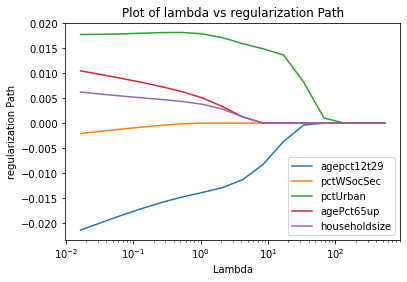

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df_train = pd.read_table("crime-train.txt")
df_test = pd.read_table("crime-test.txt")
n=1595
d=96
y=np.zeros(n)
X=df_train.drop('ViolentCrimesPerPop',axis=1).values   # dropping the fisrt column
y=df_train['ViolentCrimesPerPop'].values               # making the first column as Y
W=np.zeros(d-1)
count1=[]
lambda1=[]
lambdaa=np.zeros(n)
agepct12t29=[]
agePct65up=[]
pctUrban=[]
pctWSocSec=[]
householdsize=[]
sum=0;

#calculating the lambdamax
for i in range(1595):
    sum=sum+y[i]
sum=sum/1595

for k in range(95):
    lam=0
    for i in range(1595):
        lam=2*df_train.iloc[i][k+1]*(y[i]-sum)+lam
    lambdaa[k]=np.linalg.norm(lam)
lambdamax=np.max(lambdaa)
Weight=[]

#looping on lambdamax
while lambdamax>0.01:
    ak=np.zeros(d-1)
    b=np.zeros(n)
    ck=0
    check=np.zeros(d-1)
    epsilon=np.zeros(d-1)
    count=0
    converged=False
    
    #looping on convergence
    while not converged:
        b=np.sum(y-np.dot(X,W.T))
        b=b/n
        check[:]=W
        
        #Looping on each and every column 
        for k in range(d-1):
            Xk=X[:,k]
            Xj=np.delete(X,k, axis=1)
            Wj=np.delete(W,k,axis=0)
            ak=2*np.sum(np.square(Xk))
            ck=2*np.sum(np.dot(Xk.T,(y-(b+np.dot(Xj,Wj.T)))))         
            if ck<-lambdamax:
                W[k]=(ck+lambdamax)/ak
            elif ck >= -lambdamax and ck <= lambdamax:
                W[k]=0
            else:
                W[k]=(ck-lambdamax)/ak
        
        # calculating the convergence 
        epsilon=np.absolute(np.array(W) - np.array(check))
        converged=True
        
        #checking the convergence
        for i in range(d-1):
            if epsilon[i]>0.01:
                converged=False
                break  
    
    #collecting the weights every time after convergence
    agepct12t29.append(float(W[df_train.columns.get_loc('agePct12t29')-1]))
    pctWSocSec.append(float(W[df_train.columns.get_loc('pctWSocSec')-1]))
    pctUrban.append(float(W[df_train.columns.get_loc('pctUrban')-1]))
    agePct65up.append(float(W[df_train.columns.get_loc('agePct65up')-1]))
    householdsize.append(float(W[df_train.columns.get_loc('householdsize')-1]))
    
    lambda1.append(lambdamax)
    lambdamax=lambdamax/2

#Plotting 
plt.semilogx(lambda1,agepct12t29,label='agepct12t29') 
plt.semilogx(lambda1,pctWSocSec,label='pctWSocSec') 
plt.semilogx(lambda1,pctUrban,label='pctUrban') 
plt.semilogx(lambda1,agePct65up,label='agePct65up') 
plt.semilogx(lambda1,householdsize,label='householdsize') 
plt.xlabel('Lambda')
plt.ylabel('regularization Path')
plt.title("Plot of lambda vs regularization Path")
plt.legend()
plt.show()